**About Dataset**<br>
Context and Content<br>
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.<br>

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.<br>

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target<br>

Note:<br>
The dataset is imbalanced.<br>
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.<br>
Missing imputation can be a part of your pipeline as well.<br>

Features<br>

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

last_new_job: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change



Import and Encode of Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.shape

(19158, 14)

In [6]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Checking different kinds of data avilable in relevent features to encode them

In [5]:
df['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [6]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [7]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [8]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [9]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

Use mapping to encode ordinal features(categorical features) to numeric

In [10]:
#make dictionary of features
relevent_experience_map={'Has relevent experience': 1,
                         'No relevent experience': 0                         
}
experience_map={'9':9, 
                '5':5, 
                '<1':0, 
                '11':11, 
                '>20':21, 
                '10':10, 
                '14':15, 
                '3':3, 
                '20':20, 
                '8':8, 
                '4':4, 
                '13':13,
                '2':2, 
                '6':6, 
                '7':7, 
                '1':1, 
                '19':19, 
                '15':15, 
                '16':16, 
                '17':17, 
                '18':18, 
                '12':12
}
last_new_job_map={'1':1, 
                  'never':0, 
                  '>4':5, 
                  '2':2, 
                  '4':4, 
                  '3':3   
}

#Tranform categorical features into numerical features
def encode(df_pre):
    df_pre.loc[:,'relevent_experience']=df_pre['relevent_experience'].map(relevent_experience_map)
    df_pre.loc[:,'experience']=df_pre['experience'].map(experience_map)
    df_pre.loc[:,'last_new_job']=df_pre['last_new_job'].map(last_new_job_map)
    
    return df_pre
df=encode(df)

*Set of columns to be transformed in different ways*

categorical column-->Fill missing values and One Hot Encoder

Numerical Column-->Fill missing values and Scaling

To prevent biases from being introduced, One-Hot Encoding is preferable for nominal data (where there is no inherent order among categories). Label encoding, however, might be more appropriate for ordinal data (where categories naturally have an order). The effect of dimensionality should also be taken into account.

In [11]:
num_cols = ['city_development_index','relevent_experience', 'experience','last_new_job', 'training_hours']

cat_cols = ['gender','education_level','enrolled_university', 'major_discipline', 'company_size', 'company_type']

Create Pipleline for numerical and categorical Features

**Pipeline(steps = [(‘step name’, transform function), …])**

**For numerical features, I perform the following actions:**

SimpleImputer to fill in the missing values with the mean of that column.

MinMaxScaler to scale the value to range from 0 to 1 (this will affect regression performance).

**For categorical features, I perform the following actions:**

SimpleImputer to fill in the missing values with the most frequency value of that column.

OneHotEncoder to split to many numerical columns for model training. (handle_unknown=’ignore’ is specified to prevent errors when it finds an unseen category in the test set)<br>


**Pipeline is a sequence of operations where output of one operation becomes input to its subsequent operation.**<br>

*LIMITATIONS OF PIPELINE*<br>

Similar to ColumnTransformer, Pipeline also outputs an array.<br>

As in ColumnTransformer, we cannot specify the column which we want to transform.

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),('min_max_scale',MinMaxScaler())])

cat_pipeline=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('one_hot',OneHotEncoder(handle_unknown='ignore', sparse=False))])

Create ColumnTransformer to Apply the Pipeline for Each Column Set

**ColumnTransformer(transformers=[(‘step name’, transform function,cols), …])**
>the column which we have not used in any transformation process should be pass as it is<

remainder='drop'


ColumnTransformer enables us to apply transform to particular columns. It help us to fit multiple transformations to multiple columns with a single fit() or fit_transform() statement. For example, we can impute mean in column 1 and OneHotEncode column 2 with a single fit statement.

*LIMITATIONS OF COLUMNTRANSFORMER*<br>
There are few limitations of ColumnTransformer. They are discussed below<br>

ColumnTransformer outputs an array even if we input a DataFrame object which makes it difficult to track the columns.<br>

In a ColumnTransformer we cannot apply multiple transforms to a single column. This is shown below<br>



In [13]:
from sklearn.compose import ColumnTransformer

col_trans=ColumnTransformer(transformers=[('num_pipeline',num_pipeline,num_cols),('cat_pipeline',cat_pipeline,cat_cols )],
                               remainder='drop',n_jobs=-1 )

Add model to pipeline by creating a new pipeline

In [14]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(random_state=42)

clf_pipeline=Pipeline(steps=[('col_trans',col_trans),('model',clf)])

> Display the pipeline

In [15]:
from sklearn import set_config
set_config(display='diagram')
display(clf_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('min_max_scale',
                                                                   MinMaxScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender', 'education_level',
                                                   'enrolled_university',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(random_state=42))])

Split Data

In [16]:
from sklearn.model_selection import train_test_split

x=df[num_cols+cat_cols]
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=21, stratify=y )

Stratify: split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

*Pass Data through the Pipeline*

**pipeline_name.fit, pipeline_name.predict, pipeline_name.score**

In [32]:
x_test.head()

,city_development_index,relevent_experience,experience,last_new_job,training_hours,gender,education_level,enrolled_university,major_discipline,company_size,company_type
8773,0.698,0,4.0,0.0,17,NaN,Masters,Full time course,STEM,NaN,NaN
7936,0.910,1,21.0,1.0,56,Male,Graduate,no_enrollment,STEM,NaN,NaN
4230,0.920,0,0.0,1.0,15,NaN,Graduate,Part time course,Business Degree,50-99,Pvt Ltd
9728,0.624,1,6.0,3.0,68,Male,Graduate,no_enrollment,STEM,10000+,Pvt Ltd
481,0.624,0,0.0,1.0,18,NaN,Masters,no_enrollment,Business Degree,10000+,Pvt Ltd


In [17]:
clf_pipeline.fit(x_train,y_train)
clf_pipeline.score(x_test,y_test)

0.7643528183716075

**Save the Pipeline**

In [18]:
# Save pipeline to file "pipe.joblib"
import joblib
joblib.dump(clf_pipeline,'pipe.joblib')

['pipe.joblib']

In [19]:
# Load pipeline when you want to use
simple_pipe=joblib.load('pipe.joblib')

In [20]:
clf_pipeline.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('min_max_scale',
                                                     MinMaxScaler())]),
                                    ['city_development_index',
                                     'relevent_experience', 'experience',
                                     'last_new_job', 'training_hours']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one_hot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=Fals

**How to Find the Changeable Pipeline Parameters**

Below the first part of parameters is list of parameters that we can change 

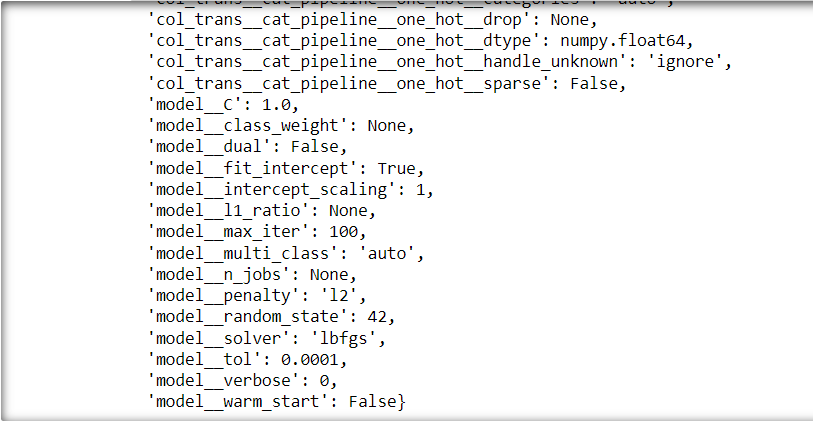

'col_trans__cat_pipeline__one_hot' means 

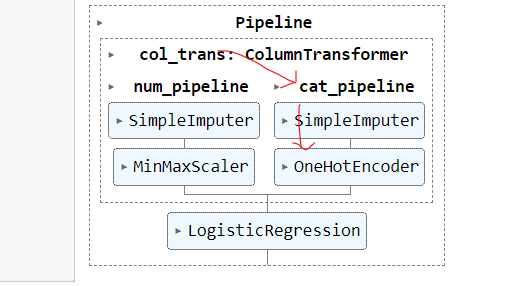

In [21]:
#to set parameter
clf_pipeline.set_params(model__C=10)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('min_max_scale',
                                                                   MinMaxScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender', 'education_level',
                                                   'enrolled_university',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(C=10, random_state=42))])

**Finding best hyperparameter**

GridSearchCV

{ ‘tuning parameter’ : ‘possible value’, … }

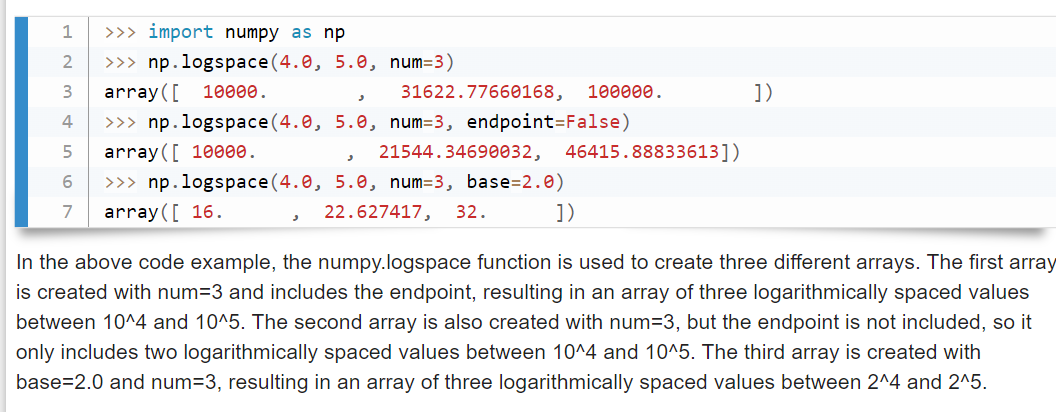

endpoint=true means ouput include the given nos. too(here, 4 and 5)

In [22]:
# l1--> Lasso Regression, l2--> Ridge Regression
# below is tuning parameter
grid_params={'model__penalty': ['none','l2','l1'],
             'model__C':np.logspace(-4,4,20)               
}

In [23]:
from sklearn.model_selection import GridSearchCV

gs=GridSearchCV(clf_pipeline,grid_params,cv=10,scoring='accuracy')
b=gs.fit(x_train,y_train)
c=gs.fit(x_test,y_test)
print("best score of b:",b.best_score_)
print("best score of c:",c.best_score_)
print("best score of b:",b.best_params_)
print("best score of c:",c.best_params_)

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn

best score of b: 0.7607002012619669
best score of c: 0.7607002012619669
best score of b: {'model__C': 0.0001, 'model__penalty': 'none'}
best score of c: {'model__C': 0.0001, 'model__penalty': 'none'}


C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver 

**How to Find the Best Data Preparation Method: Skip a Step in a Pipeline**

With the pipeline, we can create data transformation steps in the pipeline and perform a grid search to find the best step. A grid search will select which step to skip and compare the result of each case.

I want to know which scaling method will work best for my data between MinMaxScaler and StandardScaler.

In [24]:
from sklearn.preprocessing import StandardScaler

num_pipeline2=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),('min_max_scale',MinMaxScaler()),('std_scale',StandardScaler())])
col_trans2=ColumnTransformer(transformers=[('num_pipeline',num_pipeline2,num_cols),('cat_pipeline',cat_pipeline,cat_cols )],
                               remainder='drop',n_jobs=-1 )
clf_pipeline2=Pipeline(steps=[('col_trans',col_trans2),('model',clf)])

In [25]:
display(clf_pipeline2)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('min_max_scale',
                                                                   MinMaxScaler()),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender', 'education_level',
                                                   'enrolled_university',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(C=10, random_state=42))])

In [26]:
clf_pipeline2.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('min_max_scale',
                                                     MinMaxScaler()),
                                                    ('std_scale',
                                                     StandardScaler())]),
                                    ['city_development_index',
                                     'relevent_experience', 'experience',
                                     'last_new_job', 'training_hours']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one_hot',
                                

**How to Perform Grid Search**

In grid search parameters, specify the steps you want to skip and set their value to passthrough.

Since MinMaxScaler and StandardScaler should not perform at the same time, I will use a list of dictionaries for the grid search parameters.

[{case 1},{case 2}]

In [27]:
#below is list of dictionaries
grid_step_params=[{'col_trans__num_pipeline__min_max_scale':['passthrough']},{'col_trans__num_pipeline__std_scale':['passthrough']}]
gs2=GridSearchCV(clf_pipeline2,grid_step_params,cv=5,scoring='accuracy')
gs2.fit(x_train,y_train)
print("best score of train set:",(gs2.best_score_))
print("best params of train set:",(gs2.best_params_))
print("best score of test set:",(gs2.score(x_test,y_test)))

C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


best score of train set: 0.7681060177987484
best params of train set: {'col_trans__num_pipeline__min_max_scale': 'passthrough'}
best score of test set: 0.7640918580375783


The best case is minmax_scale : ‘passthrough’, so StandardScaler is the best scaling method for this data.

**The best case is minmax_scale : ‘passthrough’, so StandardScaler is the best scaling method for this data.**

You can find the best hyperparameter sets and the best data preparation method by adding tuning parameters to the dictionary of each case of the data preparation method.

In [28]:
grid_params={'model__penalty': ['none','l2','l1'],
             'model__C':np.logspace(-4,4,20)               
}

grid_step_params2=[{**{'col_trans__num_pipeline__min_max_scale':['passthrough']},**grid_params},{**{'col_trans__num_pipeline__std_scale':['passthrough']},**grid_params}]

**grid_params will be added to both case 1 (skip MinMaxScaler) and case 2 (skip StandardScalerand).**

You can merge dictionary using the syntax below.

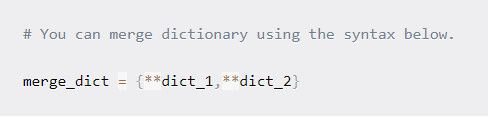

In [29]:
gs3=GridSearchCV(clf_pipeline2,grid_step_params2,cv=5,scoring='accuracy')
gs3.fit(x_train,y_train)
print("best score of train set:",(gs3.best_score_))
print("best params of train set:",(gs3.best_params_))
print("best score of test set:",(gs3.score(x_test,y_test)))


C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn

best score of train set: 0.7690195790488534
best params of train set: {'col_trans__num_pipeline__min_max_scale': 'passthrough', 'model__C': 0.012742749857031334, 'model__penalty': 'l2'}
best score of test set: 0.7659185803757829


C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\DIVYA CHITRANSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver 

You can show all grid search cases using .cv_results_:

In [30]:
pd.DataFrame(gs3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_col_trans__num_pipeline__min_max_scale,param_model__C,param_model__penalty,param_col_trans__num_pipeline__std_scale,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.104155,0.018819,0.016046,0.001424,passthrough,0.0001,none,NaN,{'col_trans__num_pipeline__min_max_scale': 'pa...,0.774951,0.771941,0.761175,0.764111,0.768026,0.768041,0.005011,38
1,0.058566,0.003543,0.015020,0.000851,passthrough,0.0001,l2,NaN,{'col_trans__num_pipeline__min_max_scale': 'pa...,0.750489,0.750408,0.750734,0.750734,0.750734,0.750620,0.000142,77
2,0.043287,0.001496,0.000000,0.000000,passthrough,0.0001,l1,NaN,{'col_trans__num_pipeline__min_max_scale': 'pa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
3,0.092656,0.001516,0.015201,0.000759,passthrough,0.000264,none,NaN,{'col_trans__num_pipeline__min_max_scale': 'pa...,0.774951,0.771941,0.761175,0.764111,0.768026,0.768041,0.005011,38
4,0.063170,0.012487,0.015436,0.000661,passthrough,0.000264,l2,NaN,{'col_trans__num_pipeline__min_max_scale': 'pa...,0.751142,0.750734,0.751387,0.751387,0.751387,0.751207,0.000255,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.089645,0.004659,0.015345,0.000962,NaN,3792.690191,l2,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.775277,0.771941,0.761175,0.764111,0.768026,0.768106,0.005102,10
116,0.054306,0.012960,0.000000,0.000000,NaN,3792.690191,l1,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
117,0.091628,0.004242,0.015460,0.001056,NaN,10000.0,none,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.775277,0.771941,0.761175,0.764111,0.768026,0.768106,0.005102,10
118,0.086744,0.007161,0.015472,0.001289,NaN,10000.0,l2,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.775277,0.771941,0.761175,0.764111,0.768026,0.768106,0.005102,10
